# Logistic Regression for Binary Classificaiton.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("./CSVs/HR_comma_sep.csv")

In [7]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [12]:
# EDA
# Let's check different categorical columns in the data set.

print(df.Department.unique())
print(df.salary.unique())
print(df.left.unique())






['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
['low' 'medium' 'high']
[1 0]


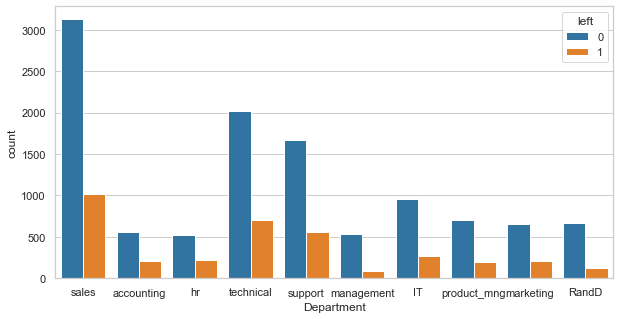

In [21]:
# Let's check the people left department wise.
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
sns.set_theme(style="whitegrid")
sns.countplot(x= df['Department'],hue=df.left,palette='tab10')
plt.show()


# We can Interprete below findings from above figure

 1) Highest number of employees are in sales department.
 2) Lowest number of employees are in management department
 3) The Atteration rate is High in Sales
 4) The Atteration rate is lowest in Management

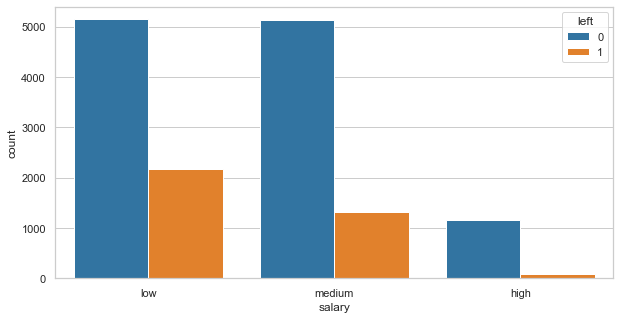

In [23]:
# Lets check the same for salary
# Let's check the people left department wise.
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(5)
sns.set_theme(style="whitegrid")
sns.countplot(x= df['salary'],hue=df.left,palette='tab10')
plt.show()


# We can Interprete below findings from above figure

 1) People with low and Medium Salary are more likely to leave the job.

In [28]:
# Let's create a pair plot to see the impact of every other column on the target column.

# rearranging the columns so that target column would be last.

df = df [ [column for column in df.columns if column!='left'] + ['left']] 

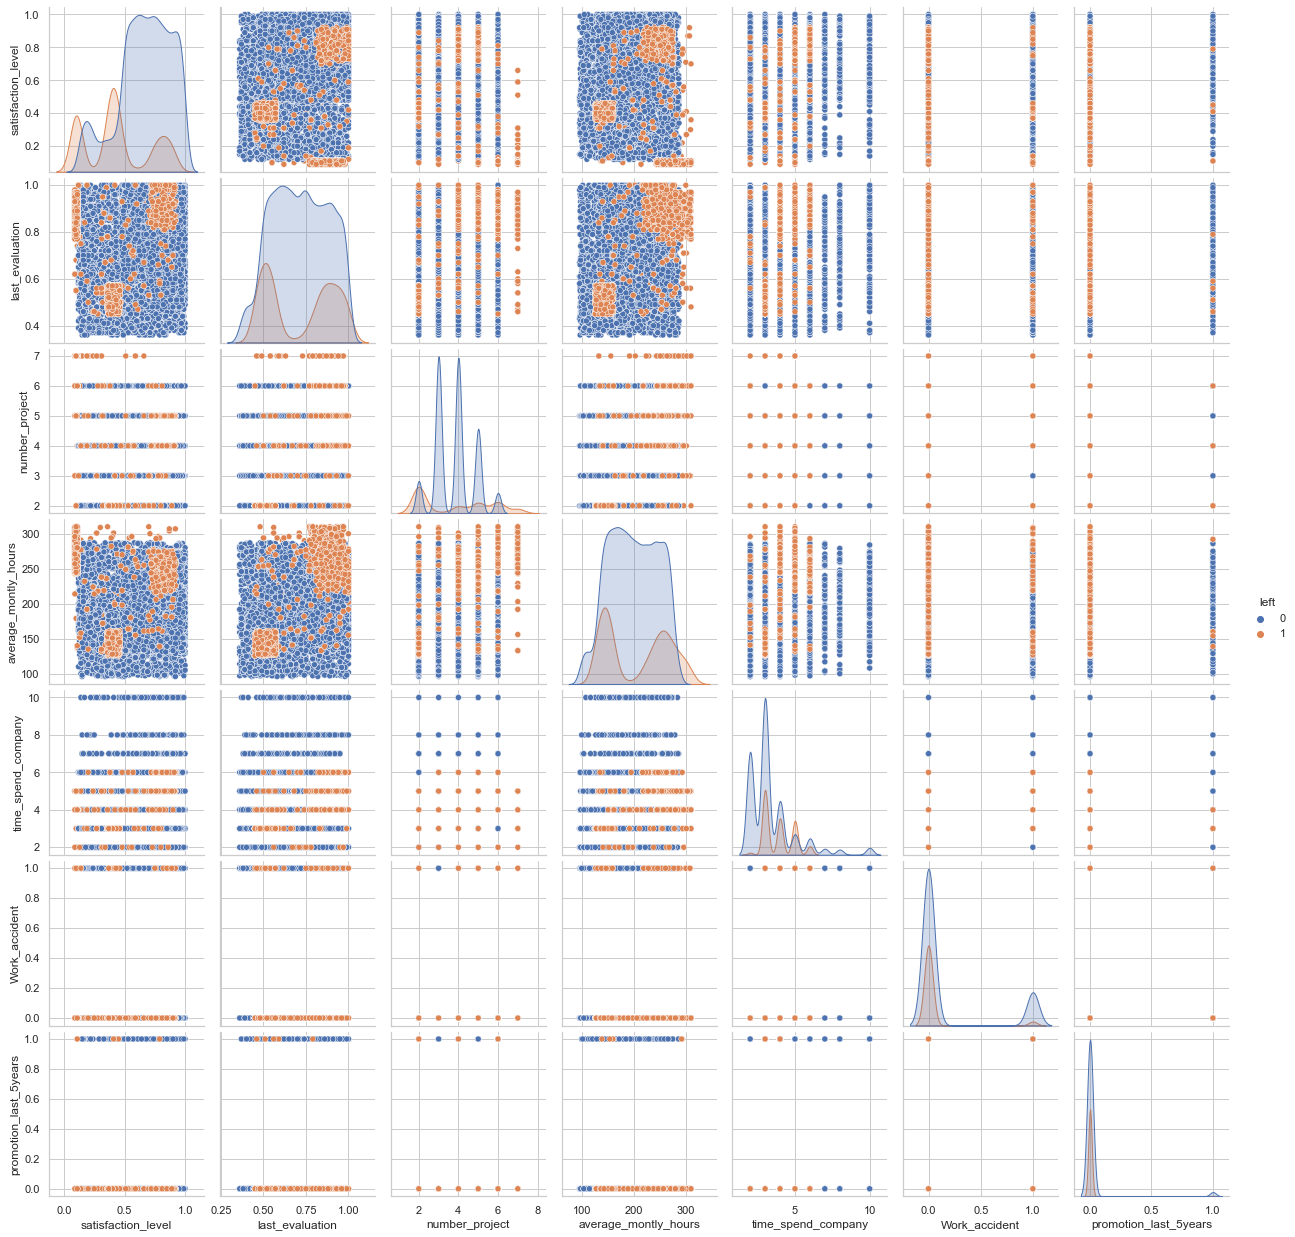

In [29]:
sns.pairplot(df,hue='left')

# We can Interprete below insights form the above graph.
1) If the satisfaction level is above 0.4, the people are more likely to stay.
2) People with evaluation rate greater than 0.6 are more likely to stay.
3) If an employee spends more than 4 month in a company, they he/she is more likely to stay.
4) People with average monthly hours less than 180 are likely to leave the company
5) People who have worked on less than 3 projects are more likely to leave the project.

<AxesSubplot:>

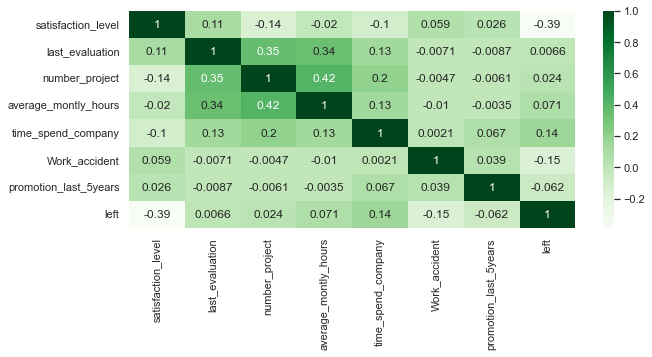

In [35]:
# Let's see which factor is playing more crutial role towards the target variable
fig  = plt.figure()
fig.set_figwidth(10)
sns.heatmap(df.corr(),annot=True,cmap='Greens')

1) Time spent in company is not the most important factor for an employee to stay.

One thing which can be said about this data is, Since there is very less linear relation between the target and other variables, A non-linear algorithm would perform better compared to a linear algorithm. Since other algorithms would be able to capture certain underlying patterns in the dataset.(Just an assumption)
Since Here I am practicing Logistic_Regression, I will continue with the same algorithm form prediction.

In [39]:
# Cleanig the data(Baisc)
# Here we will be creating dummy variables for the columns Department and salary.


cleaned_df = pd.get_dummies(data=df,columns=['Department','salary'])

cleaned_df = cleaned_df[[column for column in cleaned_df.columns if column!='left'] + ['left']]

In [44]:
# split the data into train and test

from sklearn.model_selection import train_test_split
X = cleaned_df[[column for column in cleaned_df.columns if column !='left']]
y = cleaned_df['left']

X_train,X_test,y_train,y_test = train_test_split()

In [46]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [48]:
lr.fit(X_train,y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [51]:
lr.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
lr.score(X_test,y_test)

0.8023333333333333